## SVM

## SVM is an algorithm use to overcome UnderFitting of model.
- Two Type of SVM
- Linear SVM:- Linear SVM when we seprate two class using a straight line.
- Non-Linear SVM- When we cannot separte class using a straignt line is callen Non-Linear SVM.
- Kernel- Kernel are used to increase n-dimension of data so that the class easily separable.
- There are mainly three type of non-linear kernel and one linear type kernel.
  1. C- C is used to regulation to find the optimal decision boundary.
  2. RBF(Radial-Basis Function) Kernel- it is used to increase the dimension from range of 1 to infinity to easily separabale class. its use gamma hyperparameter low value of gamma cause underfitting, and high gamma cause overfitting.
  3. Polynomial Kernel:- it is same as polynomial feature use degree to increase the n-dimension so class easily separable. it's used degree hyperparameter to control how many feature increase.
  4. Sigmoid Kernel:- it is also used to increase n-dimension of data. it's is used tanh to solve

## SVM calculate Hinge Loss to find the optimal decision boundary or decision line.
- j(w) =1/2 ||w||^2 + c * sum(maxc(0,1-y_i * f(x_i)))
- ||w|| = root(m1^2 + m2^2 + c)
- f(x_i) = m1x1 + m2xc2 + c
- Hinge loss work same as SGD to find the best value of m and c to find the best decision boundary.
- c is used to regularization parameter to controlling the trade-off between maximizing the margin and minimizing hing loss.
- initial m and c value is assign andom that greater than 0
- to update m and c value using
- m_new = m_old - alpha dl/dm_old
- c_new = c_old - alpha dl/dc_old
- alpha is learning rate
- y_i is target of ith sample

- Hyper Plane- Hypare Plane is defined as the optimal decision boundary that separtae class. it's should be maximize from the marginal boundary.

- Support Vector- Support Vector is defined that the data point that near by the decision boundary.

- Marginal boundary - marginal boundary is create using support vector of each class to calculate the distance between of decision boundary to each class
- D= d1 + d2

- Decision function calculate for linear svm
- d= sum( m_ix_i + c)  # i is total value in dataset

- Decision function calculate for non-linear svm
  1. RBF= d= sum( dual_coef_i * k(x_i' ,X_i) + intercept) # K(X' ,X)= exp(-gamma * ||X' - X||^2)
  2. Poly= d= sum( dual_coef_i * k(x_i' ,X_i) + intercept) # K(X',X)= (gamma * (X'@X + r)^d) # @ is dot product, r is constant that affect the bais of the kernel, d is degree of polynomial.
  3. Sigmoid= d= sum( dual_coef_i * k(x_i' X_i) + intercept) # K(X',X) = tanh(alpha X.X' + beta) # alpha and beta are used to control kernel function

## Multi class Classification solve in svm using two approach.
 1. OVR(One versus Rest) - for each class a separate model is created based on class after that he compute the distance for each hyperplane. max(d1,d2,d3) class is final.
 2. OVO(One versus One)- it created a separted model for each pair of classes. No of model= n*(n-1)/2 here n is total no of class.after that voting is used forv final prediction.

In [2]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df= pd.read_csv('G:/dataset/classification/fruits.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

model=SVC(kernel='linear')
cross_val_score(model,X,y,cv=5).mean()

0.96

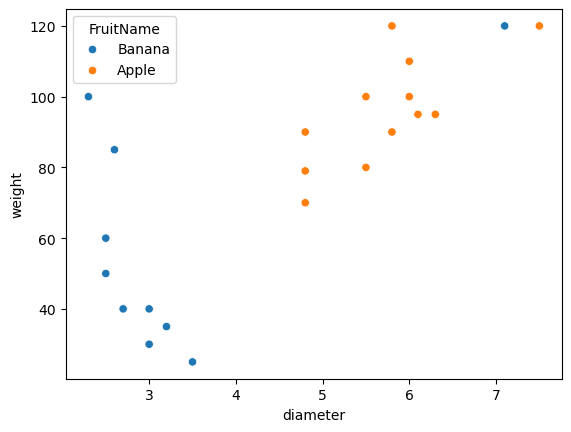

In [4]:
sb.scatterplot(x=df.diameter,y=df.weight, hue=df.FruitName)
plt.show()

In [5]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

model=SVC(kernel='linear')
cross_val_score(model,X,y,cv=5).mean()

0.6900000000000001

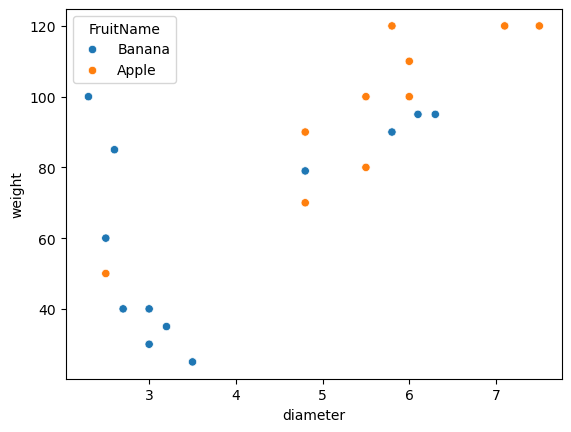

In [6]:
sb.scatterplot(x=df.diameter,y=df.weight, hue=df.FruitName)
plt.show()

In [7]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

for i in range(2,11):
    print('Degree:- ',i)
    model=SVC(kernel='poly',degree=i)
    print(cross_val_score(model,X,y,cv=5).mean())
    print('====================================================================')

Degree:-  2
0.64
Degree:-  3
0.6799999999999999
Degree:-  4
0.6799999999999999
Degree:-  5
0.6799999999999999
Degree:-  6
0.73
Degree:-  7
0.73
Degree:-  8
0.6799999999999999
Degree:-  9
0.64
Degree:-  10
0.64


In [8]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

model=SVC(kernel='rbf',gamma=0.6)
cross_val_score(model,X,y,cv=5).mean()

0.73

In [9]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

model=SVC(kernel='linear')
cross_val_score(model,X,y,cv=5).mean()

0.6900000000000001

In [10]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc= StandardScaler()
X1=sc.fit_transform(X)

model=SVC(kernel='linear')
cross_val_score(model,X1,y,cv=5).mean()

0.6900000000000001

In [11]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc= StandardScaler()
X1=sc.fit_transform(X)

model=SVC(kernel='rbf',gamma=0.3)
cross_val_score(model,X1,y,cv=5).mean()

0.77

In [12]:
df= pd.read_csv('G:/dataset/classification/fruits_svc.csv')
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
sc= StandardScaler()
X1=sc.fit_transform(X)

for i in range(2,11):
    print('Degree:- ',i)
    model=SVC(kernel='poly',degree=i)
    print(cross_val_score(model,X1,y,cv=5).mean())
    print('====================================================================')

Degree:-  2
0.42000000000000004
Degree:-  3
0.73
Degree:-  4
0.5
Degree:-  5
0.63
Degree:-  6
0.41
Degree:-  7
0.55
Degree:-  8
0.41
Degree:-  9
0.54
Degree:-  10
0.45999999999999996


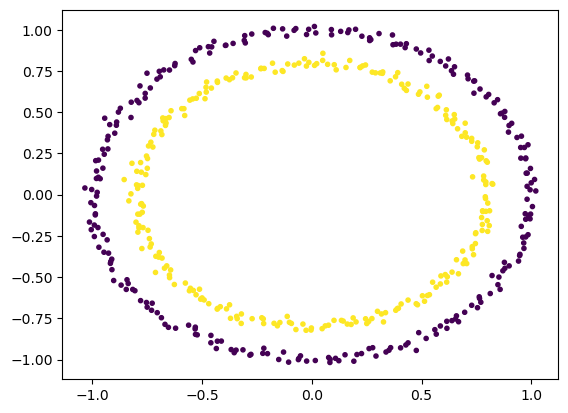

In [13]:
X,y = make_circles(n_samples = 500,noise=.02)
plt.scatter(X[:, 0], X[:, 1],c=y,marker='.') 
plt.show()

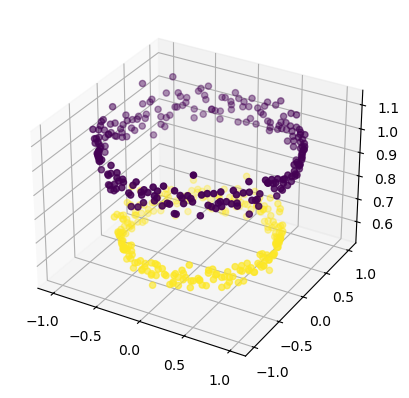

In [14]:
X1 = X[:, 0]
X2 = X[:, 1]
X3 = (X1**2 + X2**2)

fig = plt.figure() 
axes=fig.add_subplot(projection = '3d') 
axes.scatter(X1,X2,X3,c=y) 
plt.show()

In [15]:
model=SVC(kernel='rbf',probability=True)
model.fit(X,y)
cross_val_score(model,X,y,cv=5).mean()

1.0

In [16]:
samples=[2.5,70]
sample=sc.transform([samples])
model.predict_proba(sample)

array([[9.9999990e-01, 1.0000001e-07]])

In [17]:
model.predict(sample)

array([0], dtype=int64)

In [18]:
df=pd.read_csv('G:/dataset/classification/fruits.csv')
df.FruitName=df.FruitName.map({'Apple':-1,'Banana':1})
print(df.head(2))
X=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

model=SVC(kernel='linear')
model.fit(X,y)

   diameter  weight  FruitName
0       3.0      30          1
1       6.0     100         -1


SVC(kernel='linear')

In [19]:
model.coef_

array([[-0.87956593, -0.01319065]])

In [20]:
model.intercept_

array([4.40849056])

In [21]:
sample=[[3,70],[5,90]]
model.decision_function(sample)

array([ 0.84644742, -1.1764974 ])

In [26]:
model.predict(sample)

array([ 1, -1], dtype=int64)

In [33]:
d=-0.87956593*3 + 70*-0.01319065 + 4.40849056
print(d)

d=-0.87956593*5 + 90*-0.01319065 + 4.40849056
print(d)

0.8464472699999996
-1.1764975900000003


In [36]:
gm=0.6
model=SVC(kernel='rbf',gamma=gm)
model.fit(X,y)

SVC(gamma=0.6)

In [44]:
model.coef_

AttributeError: coef_ is only available when using a linear kernel

In [50]:
model.intercept_

array([0.01788872])

In [52]:
model.dual_coef_

array([[-0.54129096, -0.52494051, -0.72256581, -1.        , -0.72256581,
        -1.        , -1.        , -0.50525679, -0.55403523, -1.        ,
        -0.65708558, -0.65708513,  0.98211212,  0.98162522,  1.        ,
         0.98222034,  0.98393107,  0.98178396,  0.5040664 ,  0.98222008,
         0.98222033,  0.50464628]])

In [54]:
model.n_support_

array([12, 10])

In [56]:
# d= sum( dual_coef_i * k(x_i' ,X_i) + intercept) # K(X' ,X)= exp(-gamma * ||X' - X||^2)

In [58]:
sample=[3,70]
dc=model.dual_coef_
sqr_equi_dist=np.square(model.support_vectors_ - sample).sum(axis=1)
kernel=np.exp(-gm * sqr_equi_dist)
d=(dc*kernel).sum()+model.intercept_
print(d)
model.decision_function([sample])

[-0.12524156]


array([-0.12524156])

In [60]:
gm=0.6
deg=3
model=SVC(kernel='poly',degree=deg,gamma=gm)
model.fit(X,y)

SVC(gamma=0.6, kernel='poly')

In [62]:
model.dual_coef_

array([[-0.63186014, -1.        , -0.86221843,  1.        ,  0.49407857,
         1.        ]])

In [64]:
model.intercept_

array([1841.98357206])

In [66]:
model.coef0

0.0

In [46]:
#Poly= d= sum( dual_coef_i * k(x_i' ,X_i) + intercept) # K(X',X)= (gamma * (X'@X + r)^d) # @ is dot product, r is constant that affect the bais of the kernel, d is degree of polynomial.

In [68]:
sample = [3, 70]
dotprod = np.dot(model.support_vectors_, sample)
kernel = (gm * dotprod + model.coef0) ** deg
d=(model.dual_coef_*kernel).sum() + model.intercept_
d

array([-2373.89765352])

In [70]:
model.decision_function([sample])

array([-2373.89766497])

In [72]:
gm=0.6
model=SVC(kernel='sigmoid',gamma=gm)
model.fit(X,y)

SVC(gamma=0.6, kernel='sigmoid')

In [74]:
sample = [3, 70]
dotprod = np.dot(model.support_vectors_, sample)
kernel = np.tanh(gm * dotprod + model.coef0)
d=(model.dual_coef_*kernel).sum() + model.intercept_
d

array([-1.])

In [76]:
model.decision_function([sample])

array([-1.])

In [82]:
df=load_iris()
X=df.data
y=df.target

model=SVC(kernel='linear')
model.fit(X,y)

SVC(kernel='linear')

In [84]:
model.coef_

array([[-0.04625854,  0.5211828 , -1.00304462, -0.46412978],
       [-0.00722313,  0.17894121, -0.53836459, -0.29239263],
       [ 0.59549776,  0.9739003 , -2.03099958, -2.00630267]])

In [86]:
model.intercept_

array([1.4528445 , 1.50771313, 6.78097119])

In [88]:
sample=[3.6,1.3,5.7,.7]
model.decision_function([sample])

array([[-0.28311297,  1.18765319,  2.27101983]])

In [90]:
model.predict([sample])

array([2])